<h2 align="center">8_D</h2> 

#### Importing libraries

In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Reading the dataset

In [13]:
data = pd.read_csv('task_d.csv')

In [14]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [15]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

###### 1. Finding the Correlation between the features

In [16]:
corr=data[data.columns[:-1]].corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


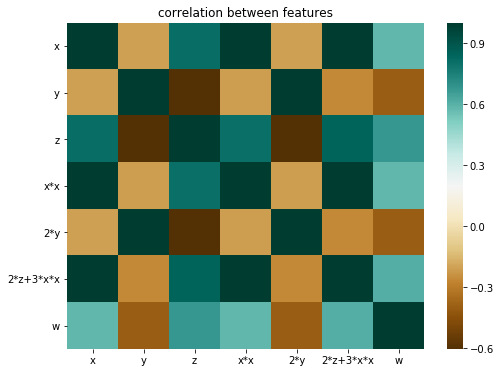

In [17]:
plt.figure(figsize=(8,6))
plt.title("correlation between features")
sns.heatmap(corr, cmap="BrBG",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Task: 1 Logistic Regression

In [18]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
param_grid={'C':alpha}
logreg = LogisticRegression()

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


###### 2. Finding the best model for the given data 

In [19]:
logreg = GridSearchCV(logreg, param_grid, cv=5)

In [20]:
logreg.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 2.78256e-04, 7.74264e-03, 2.15443e-01, 5.99484e+00,
       1.66810e+02, 4.64159e+03, 1.29155e+05, 3.59381e+06, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
logreg.best_params_

{'C': 1e-05}

######  3. Getting the weights with the original data

In [22]:
best_model=LogisticRegression(C=1e-05)

In [23]:
best_model.fit(X,Y)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predictions = best_model.predict(X)

In [25]:
accu=accuracy_score(Y, predictions)
print(accuracy_score(Y, predictions))


1.0


In [26]:
wei=best_model.coef_[0]
print(best_model.coef_)

[[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
   0.00032048]]


######  4. Modifying original data

In [29]:
X_NEW=X+.01 # ADDING NOISE

In [30]:
updated_model=best_model.fit(X_NEW,Y)

In [31]:
prediction = best_model.predict(X_NEW)

In [32]:
new_accu=accuracy_score(Y, prediction)
print(accuracy_score(Y, prediction))

1.0


In [33]:
w_new=updated_model.coef_
w_new

array([[ 0.00036369, -0.000345  ,  0.00048449,  0.00035933, -0.000345  ,
         0.00038189,  0.00032048]])

######  5.  Checking deviations in metric and weights 

In [34]:
print(new_accu-accu)

0.0


In [35]:
difference=abs((wei-w_new))[0]
print(difference)

[3.04620171e-11 3.04801046e-11 3.04930581e-11 3.04600787e-11
 3.04801046e-11 3.04634312e-11 3.04687841e-11]


In [36]:
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                   # calulating the percentage change in weight
    cp=(difference[i]/wei[i])*100
    percentage_change.append(cp)
    

In [37]:
columns=list(data.columns.values)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("the top 4 features which have higher % change in weights ")
for j in indices:
    print(columns[j])

the top 4 features which have higher % change in weights 
2*z+3*x*x
x
x*x
w


### Task: 2 Linear SVM

######  2. Finding the best model for the given data

In [38]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
param_grid={'C':alpha}
svm = SVC(kernel="linear")

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [39]:
model = GridSearchCV(svm, param_grid, cv=5)

In [40]:
model.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 2.78256e-04, 7.74264e-03, 2.15443e-01, 5.99484e+00,
       1.66810e+02, 4.64159e+03, 1.29155e+05, 3.59381e+06, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
model.best_params_

{'C': 0.007742636826811269}

###### 3. Getting the weights with the original data

In [42]:
best_model=SVC(kernel='linear',C=0.007742636826811269)

In [43]:
best_model.fit(X,Y)

SVC(C=0.007742636826811269, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
predictions = best_model.predict(X)
accu=accuracy_score(Y, predictions)
print(accuracy_score(Y, predictions))


1.0


In [45]:
wei=best_model.coef_[0]
print(best_model.coef_)

[[ 0.16056222 -0.20788705  0.32826166  0.14998082 -0.20788705  0.17461587
   0.13401176]]


######  4. Modifying original data

In [46]:
X_NEW=X+.01

In [47]:
updated_model=best_model.fit(X_NEW,Y)

In [48]:
prediction = best_model.predict(X_NEW)

In [49]:
new_accu=accuracy_score(Y, prediction)
print(accuracy_score(Y, prediction))

1.0


In [50]:
w_new=updated_model.coef_

In [51]:
w_new

array([[ 0.16049457, -0.20810298,  0.32832289,  0.14997999, -0.20810298,
         0.17462251,  0.13395324]])

###### 5. Checking deviations in metric and weights

In [52]:
print(new_accu-accu)

0.0


In [53]:
difference=(k-w_new)[0]
print(difference)

NameError: name 'k' is not defined

In [ ]:
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                   # calulating the percentage change in weight
    cp=(difference[i]/wei[i])*100
    percentage_change.append(cp)
    

In [54]:
columns=list(data.columns.values)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("the top 4 features which have higher % change in weights ")
for j in indices:
    print(columns[j])

the top 4 features which have higher % change in weights 
2*z+3*x*x
x
x*x
w


### Observations

* FROM CORRELATION MATRIX WE CAN SEE THAT SOME FEATURES ARE HIGLY CORRELATED.
* AFTER DONE THE PERTURBATION TEST ON BOTH SVM AND LR, WEIGHT HAVE ONLY SMALL (VERY SMALL) CHANGE.
* SINCE NO ANY DRASTIC CHANGE WEIGHT WE CAN CONCLUDE THAT THERE IS NO COLLINEARITY BETWEEN FEATURES BASED ON PERTURBATION TEST.
* THE TOP 4 FEATURES WCHICH HAVE HIGHER % CHANGE IN WEIGHTS ARE FEATURES WHICH HIGHLY CORRELATED WITH OTHER FEATURES.(UNDERSTAND FROM CORRELATION MATRIX)